<a href="https://colab.research.google.com/github/saikrishna232/Advanced-House-Price-Prediction/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [90]:
df=pd.read_csv('https://raw.githubusercontent.com/saikrishna232/Advanced-House-Price-Prediction/main/Data.csv',index_col=0)

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**In Data Analysis We will Analyze To Find out the below stuff**
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)

# **Missing Values**

In [ ]:
NAN_Cols=[i for i in df.columns if df[i].isnull().sum()>0]
for i in NAN_Cols:
  print(i,'-',np.round(df[i].isnull().mean()*100,3),'% values are NULL')

LotFrontage - 17.74 % values are NULL
Alley - 93.767 % values are NULL
MasVnrType - 0.548 % values are NULL
MasVnrArea - 0.548 % values are NULL
BsmtQual - 2.534 % values are NULL
BsmtCond - 2.534 % values are NULL
BsmtExposure - 2.603 % values are NULL
BsmtFinType1 - 2.534 % values are NULL
BsmtFinType2 - 2.603 % values are NULL
Electrical - 0.068 % values are NULL
FireplaceQu - 47.26 % values are NULL
GarageType - 5.548 % values are NULL
GarageYrBlt - 5.548 % values are NULL
GarageFinish - 5.548 % values are NULL
GarageQual - 5.548 % values are NULL
GarageCond - 5.548 % values are NULL
PoolQC - 99.521 % values are NULL
Fence - 80.753 % values are NULL
MiscFeature - 96.301 % values are NULL


# **Finding relationship between missing values and SalePrice**

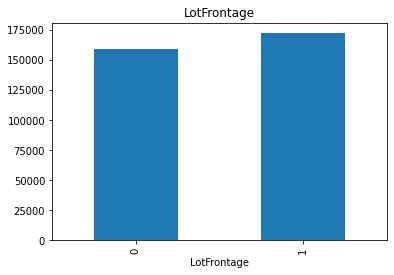

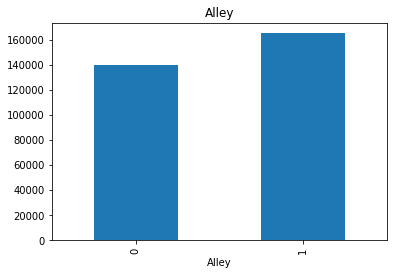

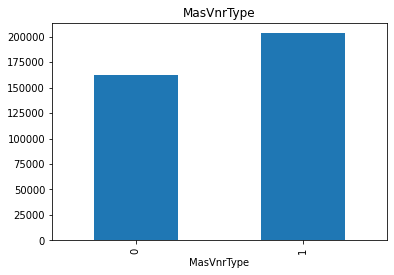

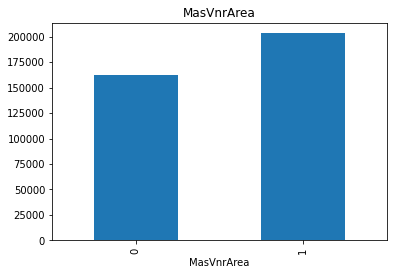

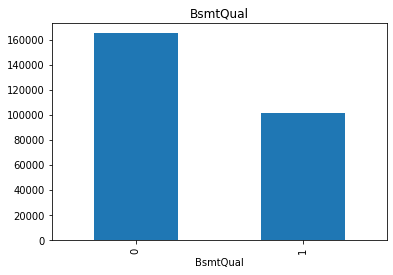

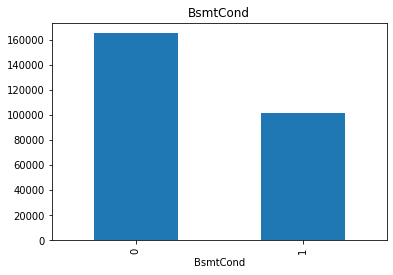

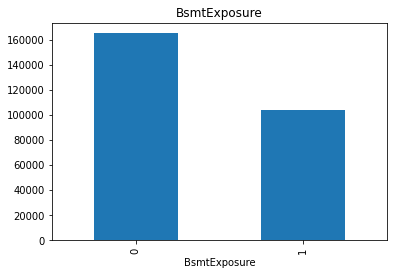

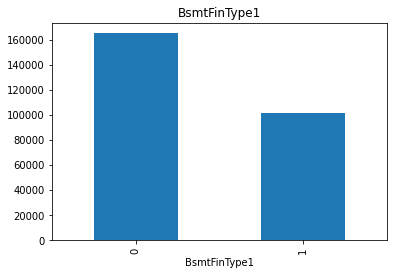

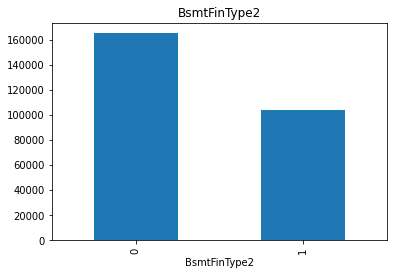

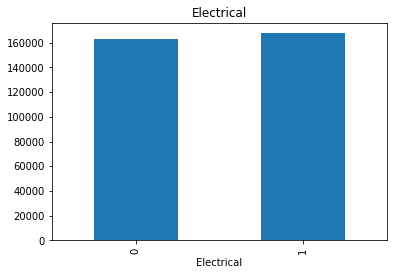

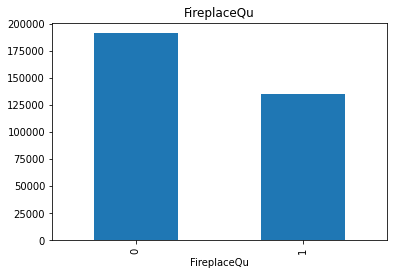

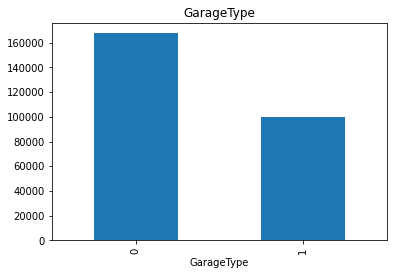

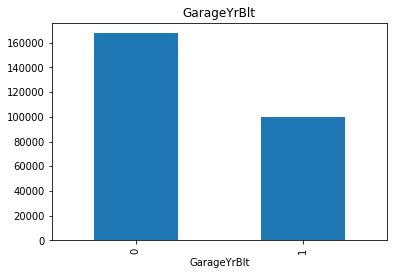

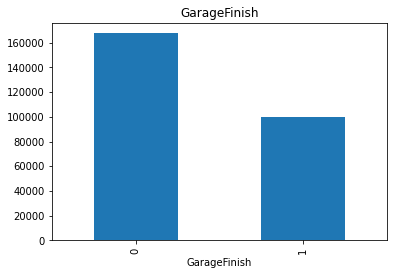

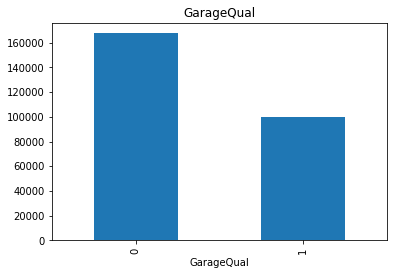

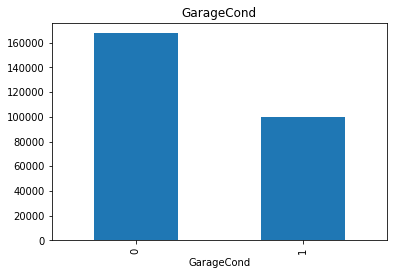

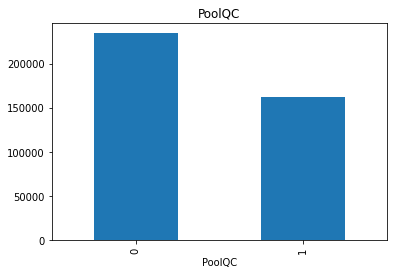

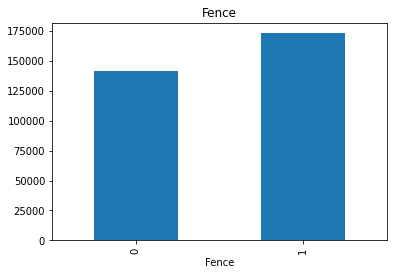

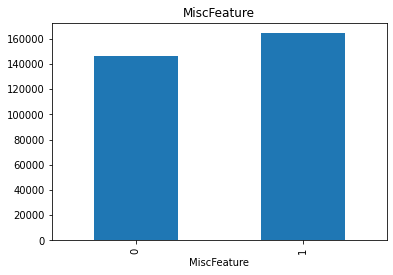

In [ ]:
for i in NAN_Cols:
  df1=df.copy()
  df1[i]=np.where(df[i].isnull(),1,0)
  df1.groupby(i)['SalePrice'].median().plot.bar()
  plt.title(i)
  plt.show()

**Observation:** Here we could see that the missing valyes and the dependent variable has some relation and we can't drop these Nan values and we need to replace these Nan values with something meaningful



# **Numerical Variables**

In [ ]:
Num_Cols=[i for i in df.columns if df[i].dtypes!='O']
len(Num_Cols)

37

# **Temporal Variables**
Extracting features which have datetime values

In [ ]:
Temporal_Cols=[i for i in df.columns if 'Yr' in i or 'Year' in i]
Temporal_Cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
for i in Temporal_Cols:
  print(i,len(df[i].unique()))

YearBuilt 112
YearRemodAdd 61
GarageYrBlt 98
YrSold 5


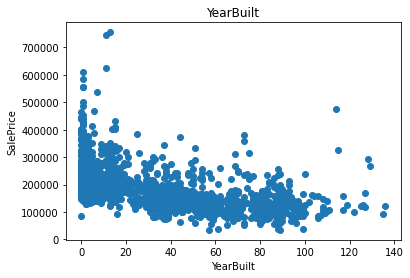

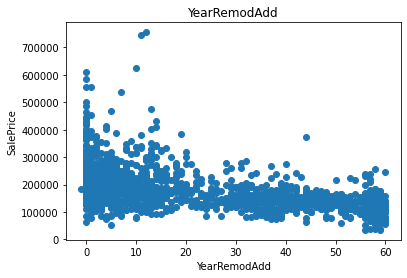

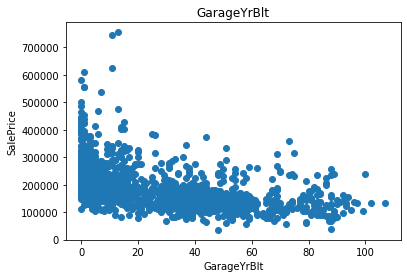

In [ ]:
for i in Temporal_Cols:
  if i!='YrSold':
    plt.scatter(df['YrSold']-df[i],df['SalePrice'])
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

**Observation:** Older the build date, cheaper the price of house.

# **Discrete Numerical Features**

In [ ]:
Disc_Cols=[i for i in df.columns if df[i].dtypes!='O' and len(df[i].unique())<25 and i not in Temporal_Cols]
len(Disc_Cols)

17

#**Relationship between discrete numerical features and SalePrice**

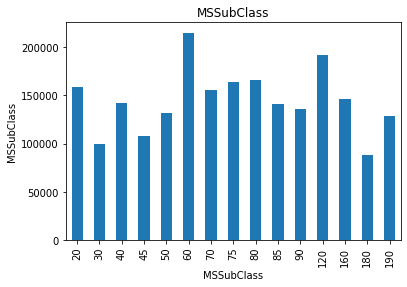

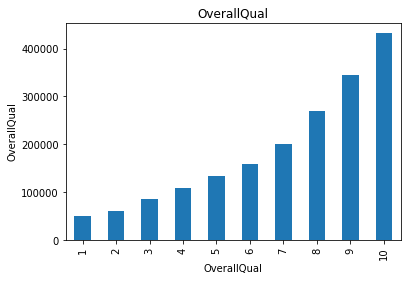

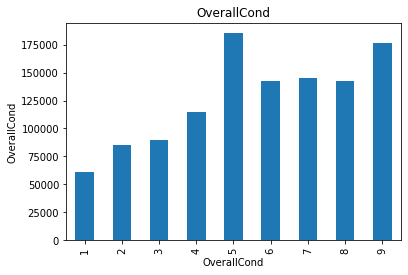

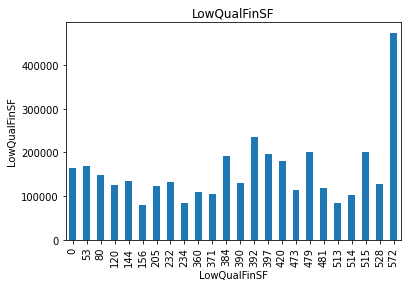

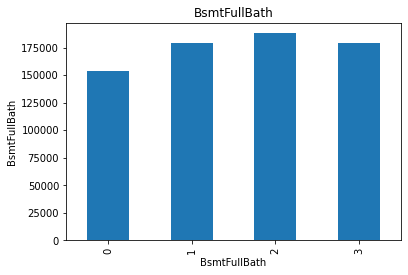

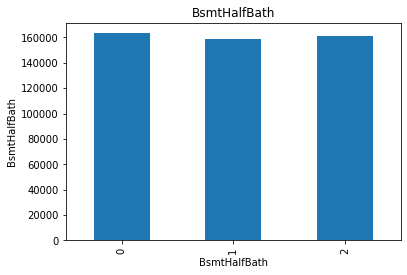

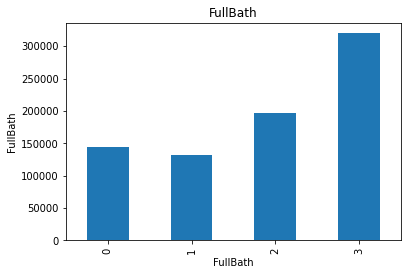

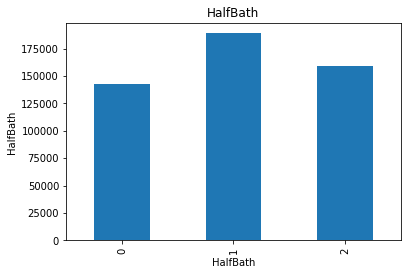

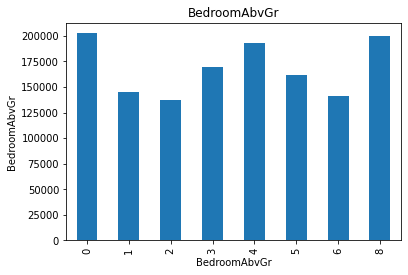

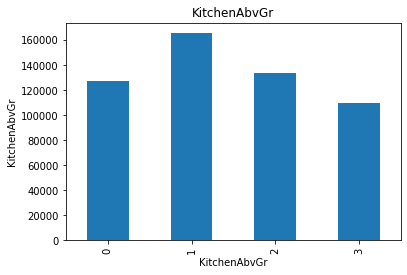

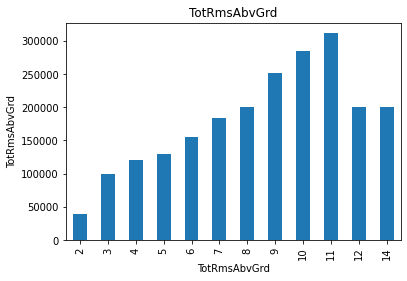

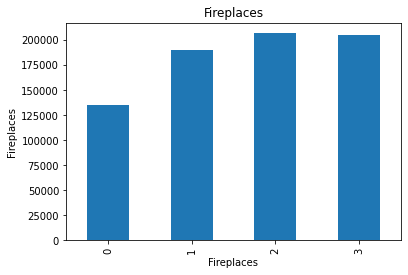

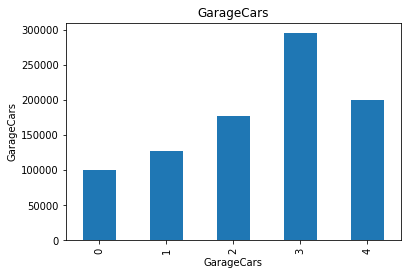

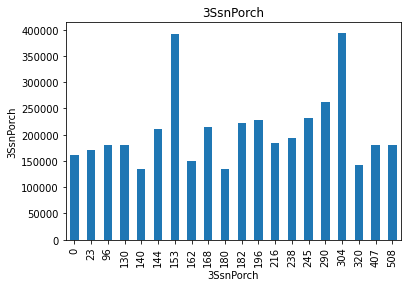

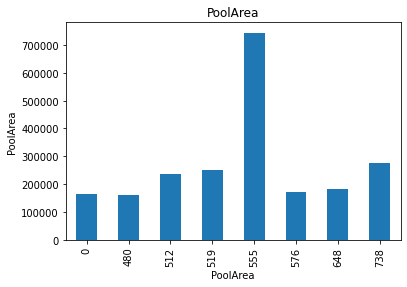

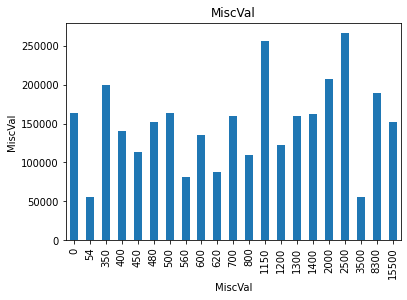

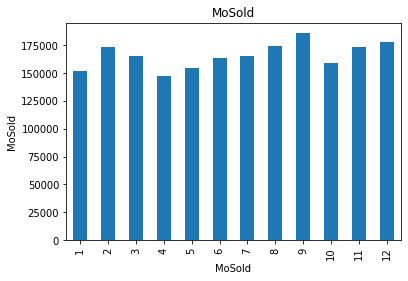

In [ ]:
for i in Disc_Cols:
  df1=df.copy()
  df1.groupby(i)['SalePrice'].median().plot.bar()
  plt.title(i)
  plt.xlabel(i)
  plt.ylabel(i)
  plt.show()

# **Continues Numerical Features**

In [77]:
Cont_Cols=[i for i in df.columns if df[i].dtypes!='O' and i not in Temporal_Cols and i not in Disc_Cols]
len(Cont_Cols)

16

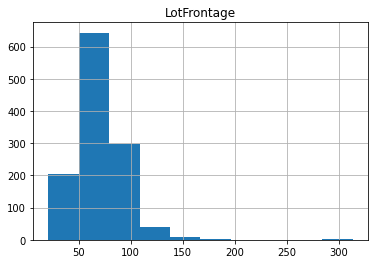

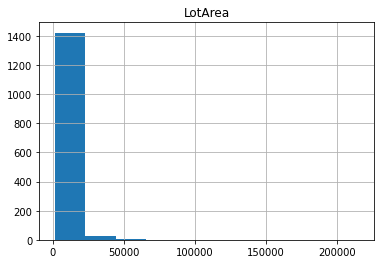

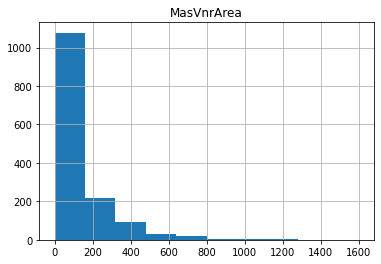

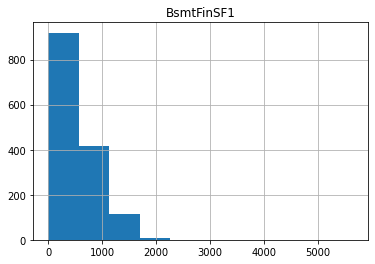

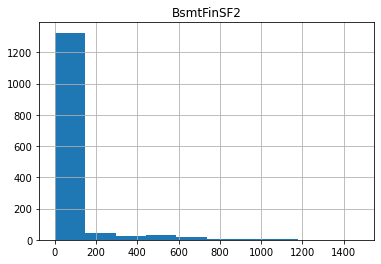

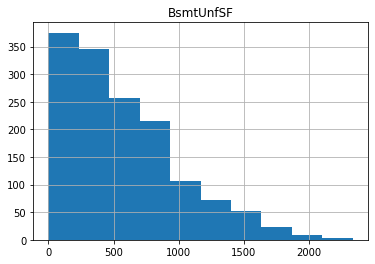

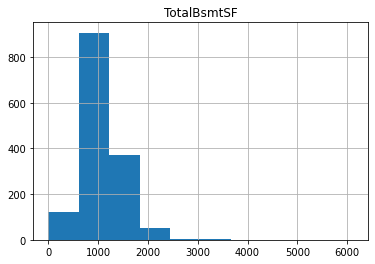

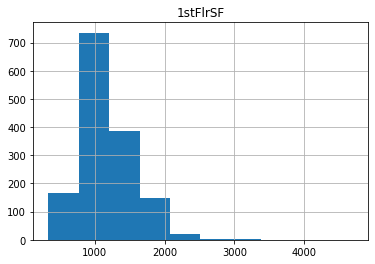

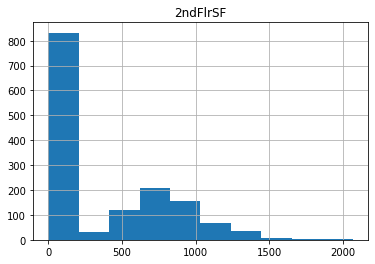

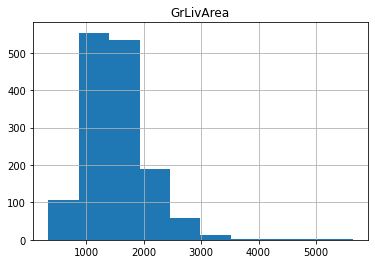

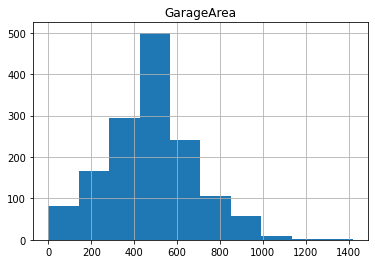

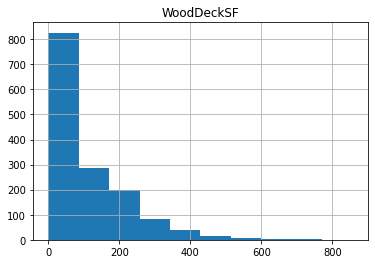

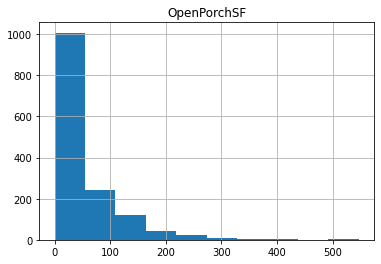

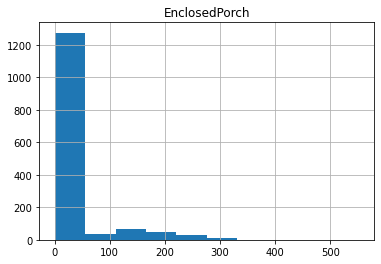

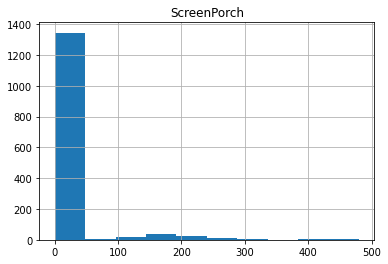

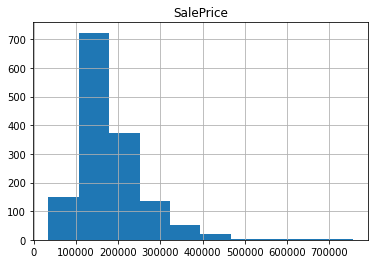

In [78]:
for i in Cont_Cols:
  df[i].hist()
  plt.title(i)
  plt.show()

# **Continuos Features by applying Log function**

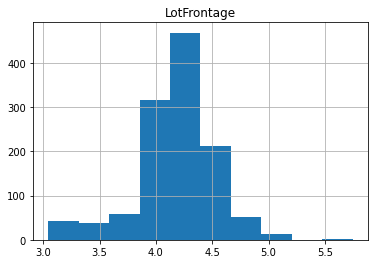

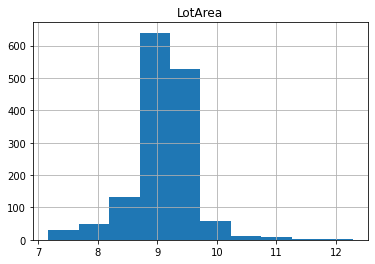

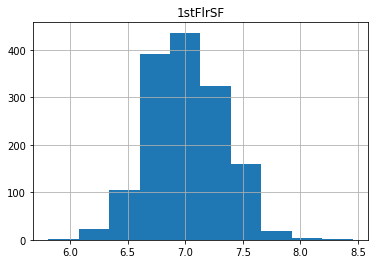

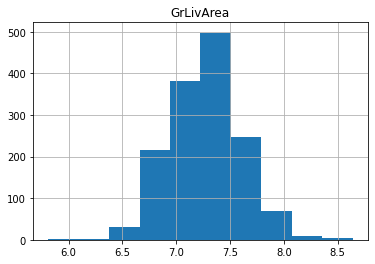

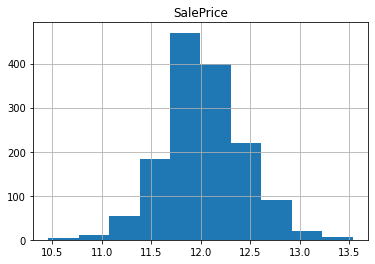

In [79]:
for i in Cont_Cols:
  df1=df.copy()
  if 0 not in df1[i].unique():
    df1[i]=np.log(df1[i])
    df1[i].hist()
    plt.title(i)
    plt.show()

# **Outliers**

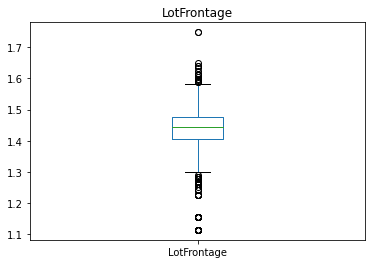

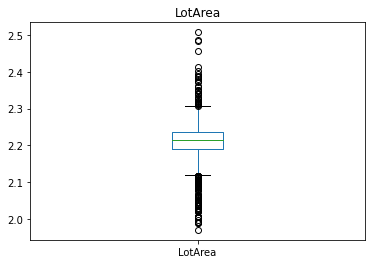

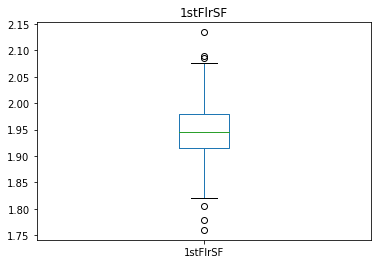

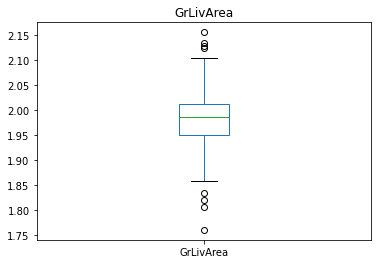

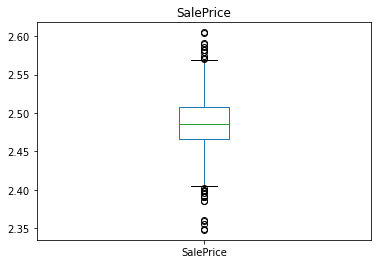

In [82]:
for i in Cont_Cols:
  df1=df.copy()
  if 0 not in df1[i].unique():
    df1[i]=np.log(df1[i])
    df1[i].plot.box()
    plt.title(i)
    plt.show()

# **Categorical Variables**

In [85]:
Cat_Cols=[i for i in df.columns if df[i].dtypes=='O']
Cat_Cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

# **Relationship between Categorical variables and SalePrice**

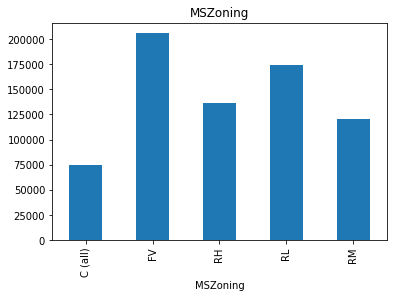

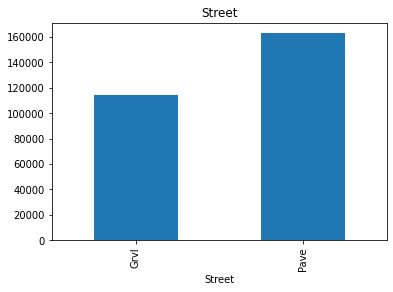

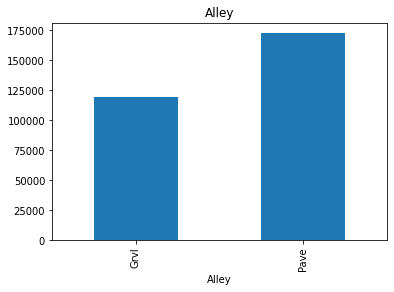

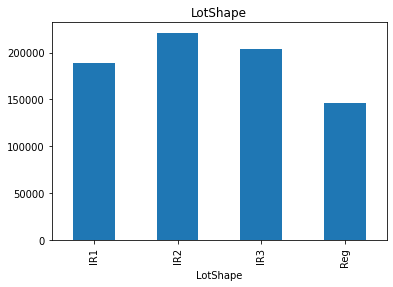

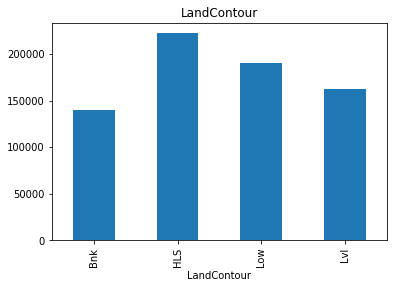

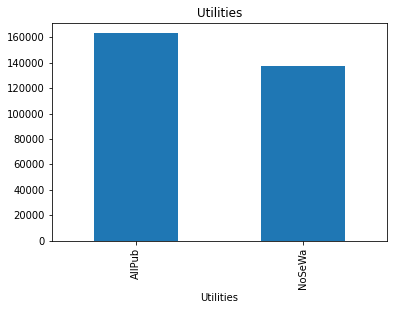

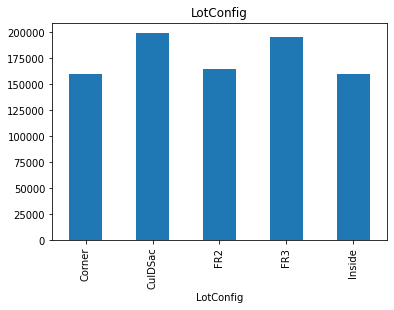

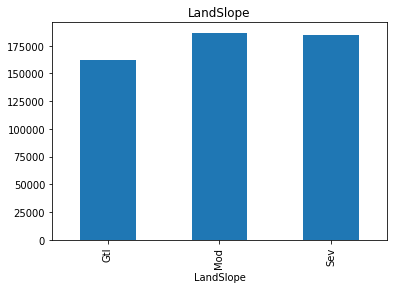

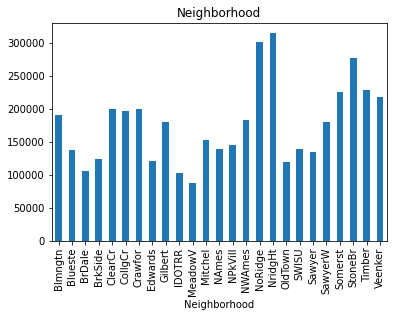

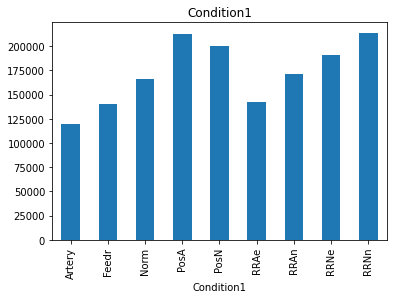

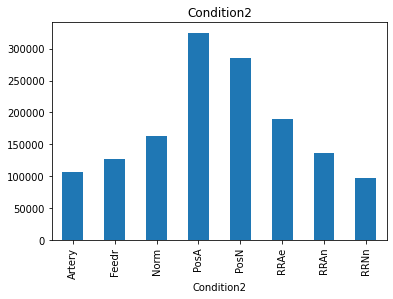

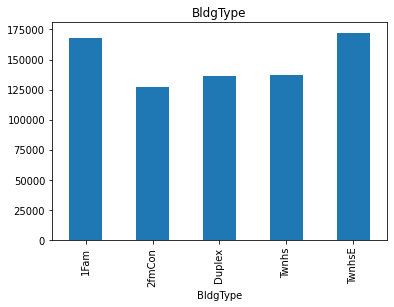

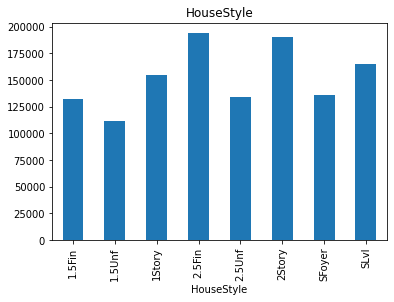

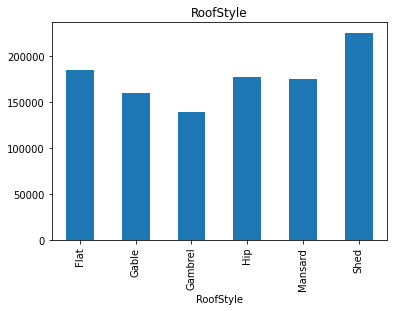

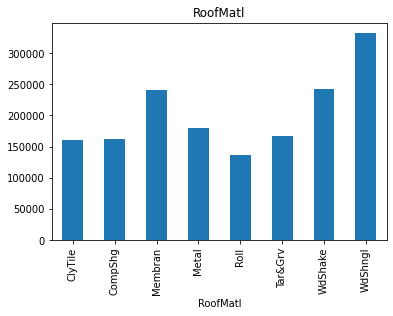

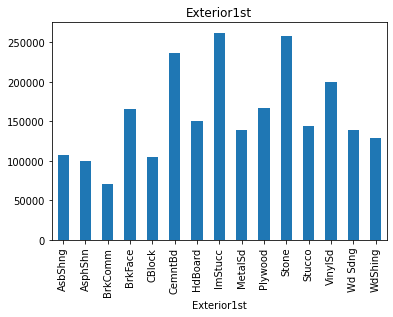

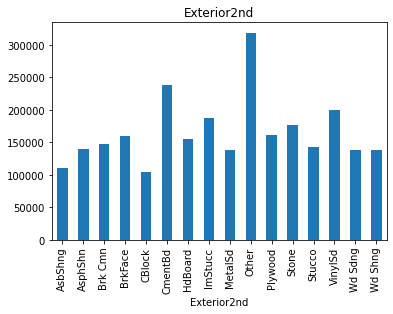

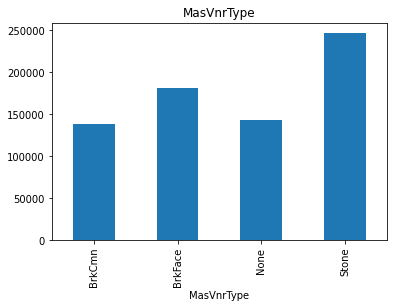

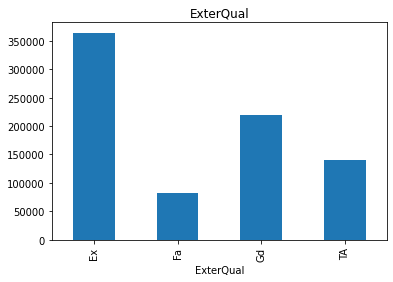

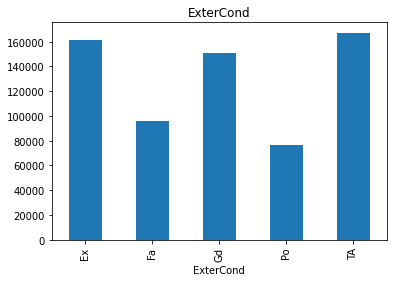

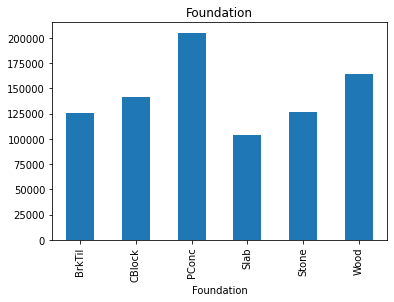

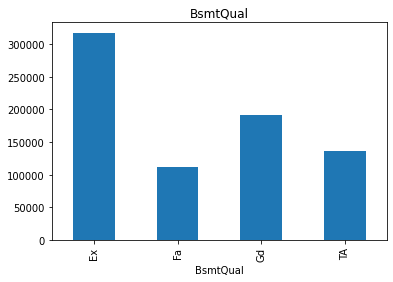

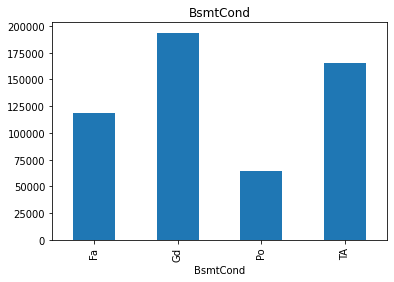

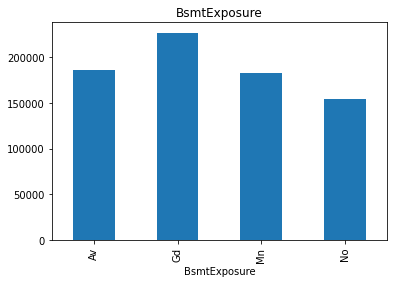

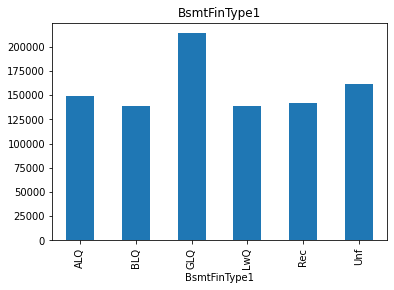

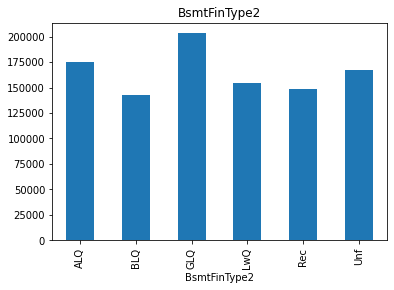

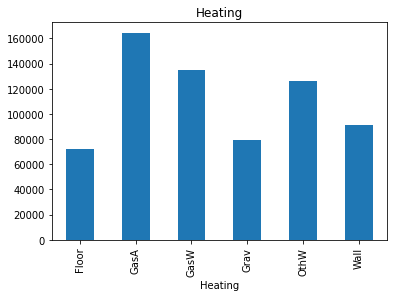

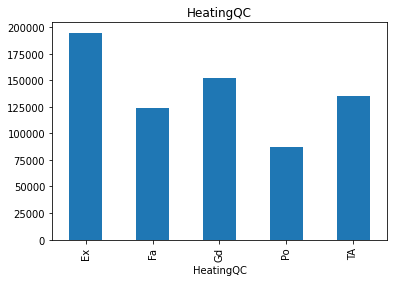

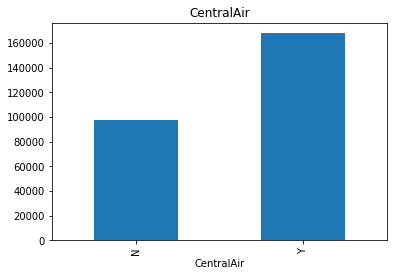

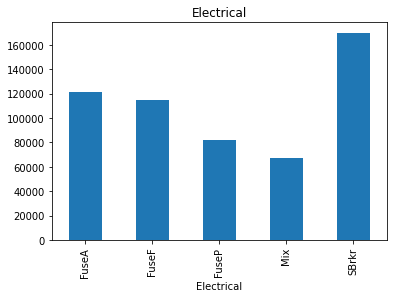

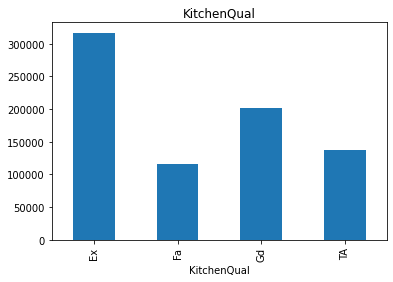

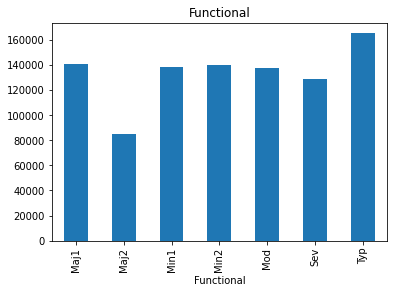

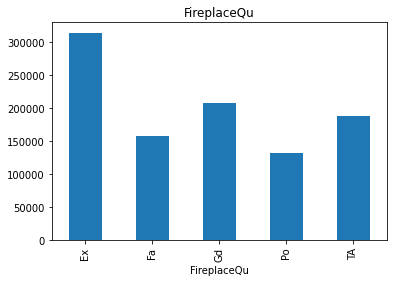

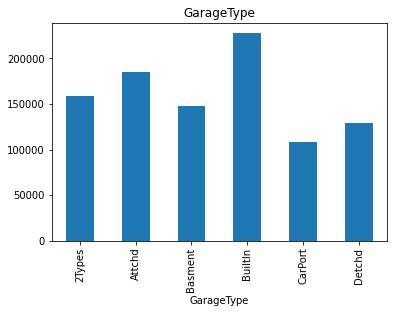

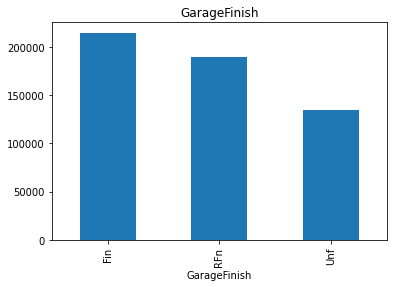

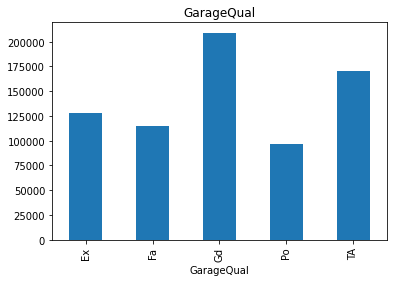

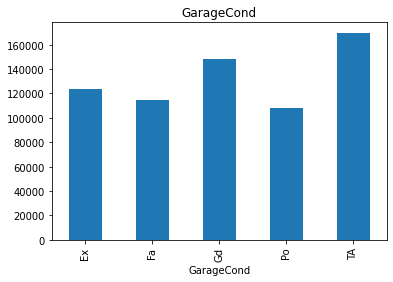

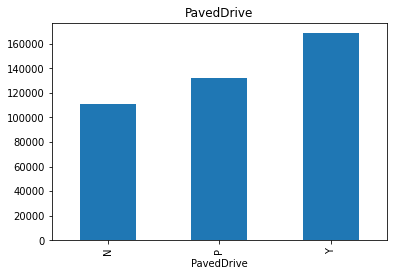

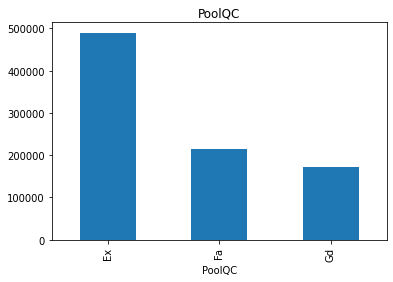

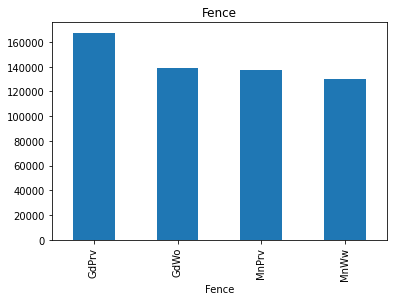

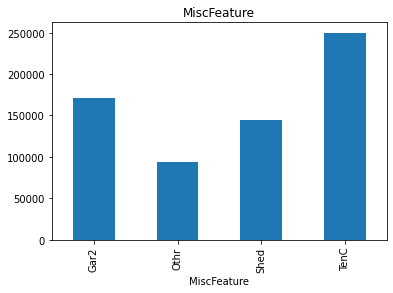

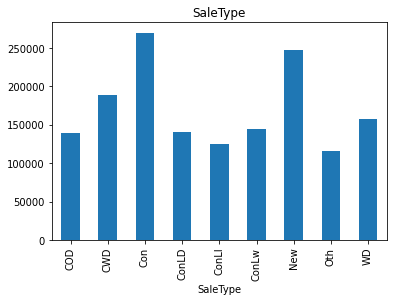

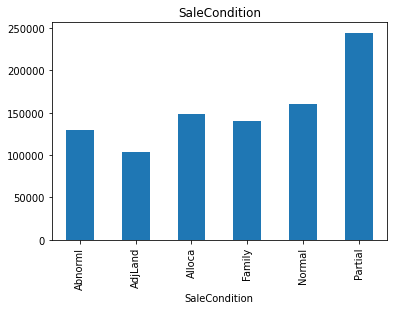

In [92]:
for i in Cat_Cols:
  df1=df.copy()
  df1.groupby(i)['SalePrice'].median().plot.bar()
  plt.title(i)
  plt.show()